In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Nov 21 19:22:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [4]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 8.0 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 2.3 MB 51.8 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 278 kB 72.8 MB/s 
     |████████████████████████████████| 213 kB 74.1 MB/s 
     |████████████████████████████████| 106 kB 65.5 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 68 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 8.9 MB/s 
     |████████████████████████████████| 68 kB 9.4 MB/s 
     |████████████████████████████████| 46 kB 5.0 

In [5]:
import gradio as gr

In [12]:
import pathlib
import glob
data_dir_path = '/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/PlantVillage'
data_dir = pathlib.Path(data_dir_path)
data_dir

PosixPath('/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/PlantVillage')

/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG


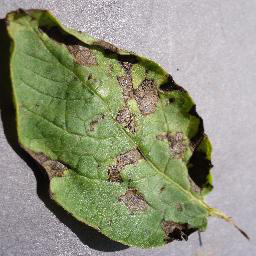

In [17]:
early_blight = list(data_dir.glob('Potato___Early_blight/*'))
len(early_blight)

print(early_blight[0])
PIL.Image.open(str(early_blight[0]))

In [19]:
batch_size = 32
img_height, img_width = 180, 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    validation_split=0.2,
    subset="training",
    seed = 123
)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [22]:
class_names = train_ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

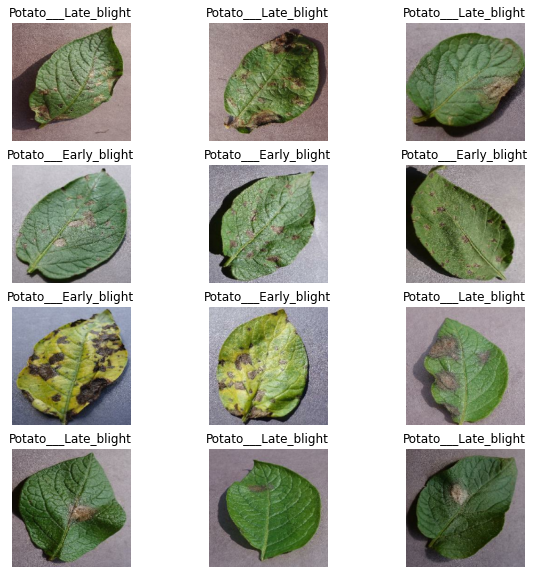

In [23]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [31]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.Conv2D(64, (3,3), padding="same", activation="relu"),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, (3,3), activation="relu"),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(156, (3,3), activation="relu"),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation="relu"),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(100, activation="relu"),
  layers.Dense(num_classes, activation="softmax")
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 88, 88, 128)      

In [33]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [38]:
epochs = 10
batch_size = 32

history = model.fit(
    train_ds,
    validation_data=val_ds,
    # batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/10
54/54 [==============================] - 8s 136ms/step - loss: 0.1253 - accuracy: 0.9530 - val_loss: 0.2299 - val_accuracy: 0.8977
Epoch 2/10
54/54 [==============================] - 8s 135ms/step - loss: 0.1399 - accuracy: 0.9472 - val_loss: 0.2526 - val_accuracy: 0.9047
Epoch 3/10
54/54 [==============================] - 9s 160ms/step - loss: 0.1576 - accuracy: 0.9454 - val_loss: 0.2342 - val_accuracy: 0.9070
Epoch 4/10
54/54 [==============================] - 8s 135ms/step - loss: 0.0894 - accuracy: 0.9721 - val_loss: 0.0904 - val_accuracy: 0.9814
Epoch 5/10
54/54 [==============================] - 8s 138ms/step - loss: 0.0977 - accuracy: 0.9657 - val_loss: 0.0837 - val_accuracy: 0.9767
Epoch 6/10
54/54 [==============================] - 8s 136ms/step - loss: 0.0953 - accuracy: 0.9704 - val_loss: 0.2466 - val_accuracy: 0.9047
Epoch 7/10
54/54 [==============================] - 8s 138ms/step - loss: 0.1700 - accuracy: 0.9413 - val_loss: 0.1350 - val_accuracy: 0.9535
Epoch 

In [39]:
model.save('/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/potato_model.hdf5')

In [40]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

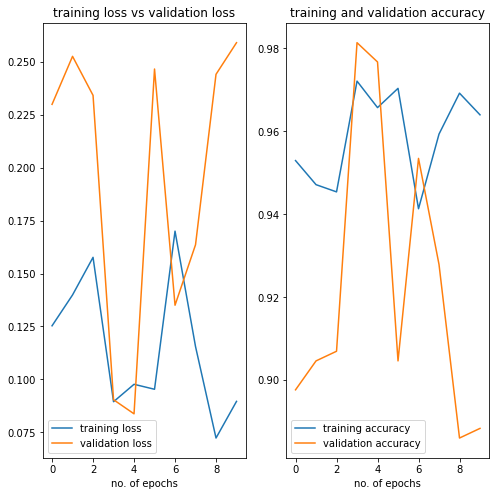

In [56]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), history.history["loss"], label="training loss")
plt.plot(range(epochs), history.history["val_loss"], label="validation loss")
plt.title("training loss vs validation loss")
plt.xlabel("no. of epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epochs), history.history["accuracy"], label="training accuracy")
plt.plot(range(epochs), history.history["val_accuracy"], label="validation accuracy")
plt.title("training and validation accuracy")
plt.xlabel("no. of epochs")
plt.legend()

In [76]:
def model_predict(img):
  img_4d = img.reshape(-1, img_height, img_width, 3)
  prediction = model.predict(img_4d)[0]
  print("Prediction: ", prediction)
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [77]:
input = gr.Image(shape=(img_height, img_width))
output = gr.Label(num_top_classes=3)

gr.Interface(fn=model_predict, inputs=input, outputs=output, interpretation="default").launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 17ms/step
Prediction:  [0.38805532 0.0032183  0.6087264 ]
1/1 [==============================] - 0s 16ms/step
Prediction:  [9.998839e-01 4.575990e-05 7.033237e-05]
1/1 [==============================] - 0s 15ms/step
Prediction:  [9.9999964e-01 3.4865300e-07 3.7792179e-15]
1/1 [==============================] - 0s 15ms/step
Prediction:  [0.00865795 0.76547366 0.22586836]
Keyboard interruption in main thread... closing server.
